In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os  
import pandas as pd
import seaborn as sns
import time
import pickle

from sklearn.metrics import auc, roc_curve, roc_auc_score


In [6]:
sns.set_theme(style="whitegrid", palette=sns.husl_palette(l=.4, n_colors=3), font_scale=1.8, context="paper")

# AUC ROC curves our models only

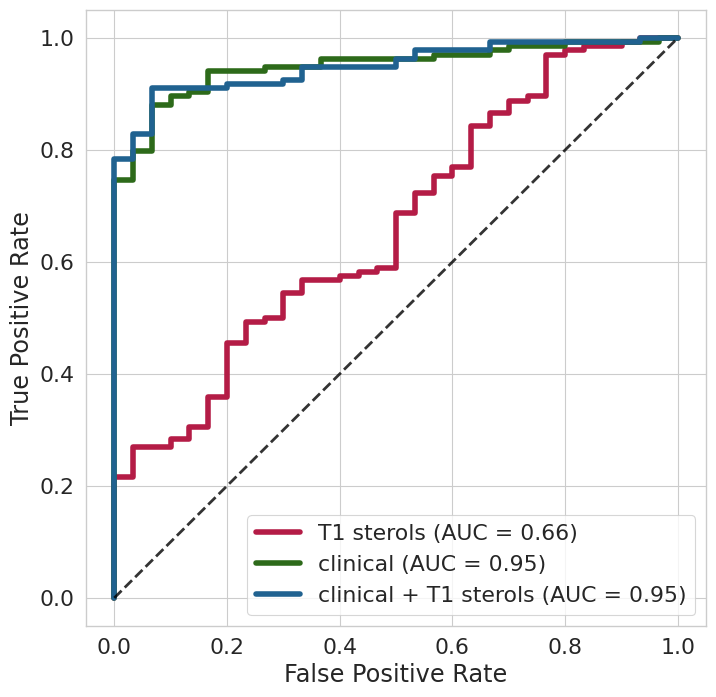

In [7]:
model = "rfc"
datasetTimepoint = "12_uponAdmission"

fileNames = {"T1":"iterativeBoruta",
             "clinical":"boruta",
             "clinical_T1":"clinical+bestSterols"}
titles =  {"T1":"T1 sterols",
            "clinical":"clinical",
            "clinical_T1":"clinical + T1 sterols"}

fig, ax = plt.subplots(1,1,figsize=(8,8))
for dataset, varset in fileNames.items():
    if dataset == "T1": 
        datasetTimepoint = "12_sterol_discoveryValidation_corrected"
    else: 
        datasetTimepoint = "12_uponAdmission"

    prodPred = pd.read_csv(f"../../{dataset}/results/prediction/featureSelection/{datasetTimepoint}/{varset}/modelComparison/zigaPipeline/individualPredictions_test_{model}.csv") 

    fpr, tpr, _ = roc_curve(prodPred["y_true"],prodPred["y_predProb"])
    
    auc_val = auc(fpr, tpr)
    ax.plot(fpr, tpr, lw=4, alpha=1, label=f'{titles[dataset]} (AUC = %0.2f)' % (auc_val))
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    plt.legend(loc="lower right")

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k', label='Chance level', alpha=.8)
plt.show()

# AUC ROC with COVID-GRAM

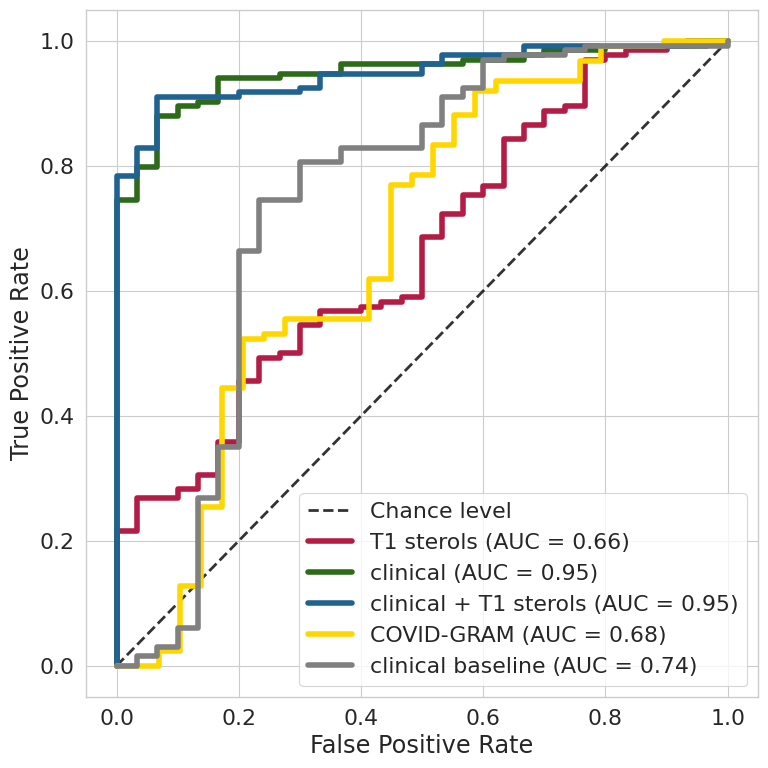

In [8]:
''' 
General settings
'''
model = "rfc"
datasetTimepoint = "12_uponAdmission"
fileNames = {"T1":"iterativeBoruta",
             "clinical":"boruta",
             "clinical_T1":"clinical+bestSterols"}
titles =  {"T1":"T1 sterols",
            "clinical":"clinical",
            "clinical_T1":"clinical + T1 sterols"}

''' 
Print settings
'''
alpha = 1
lw = 4

fig, ax = plt.subplots(1,1,figsize=(8,8))
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k', label='Chance level', alpha=.8)

for dataset, varset in fileNames.items():
    if dataset == "T1": 
        datasetTimepoint = "12_sterol_discoveryValidation_corrected"
    else: 
        datasetTimepoint = "12_uponAdmission"

    prodPred = pd.read_csv(f"../../{dataset}/results/prediction/featureSelection/{datasetTimepoint}/{varset}/modelComparison/zigaPipeline/individualPredictions_test_{model}.csv") 

    fpr, tpr, _ = roc_curve(prodPred["y_true"],prodPred["y_predProb"])
    
    auc_val = auc(fpr, tpr)
    ax.plot(fpr, tpr, lw=lw, alpha=alpha, label=f'{titles[dataset]} (AUC = %0.2f)' % (auc_val))
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')


'''
Add COVID GRAM AUC ROC curve 
'''

with open("/home/skatz/PROJECTS/covid/disease_severity/discoveryValidation/clinical/results/prediction/COVID_GRAM/fpr_tpr_auc.p", "rb") as f: gram_fpr, gram_tpr = pickle.load(f)
gram_roc_auc = auc(gram_fpr, gram_tpr)

ax.plot(gram_fpr, gram_tpr, color='gold', alpha=alpha,
         lw=lw, label=f'COVID-GRAM (AUC = %0.2f)' % gram_roc_auc)

''''''


'''
Add clinicians vars 
'''

prodPred = pd.read_csv(f"../../clinical/results/prediction/featureSelection/clinicians/clinicians_vars/modelComparison/zigaPipeline/individualPredictions_test_{model}.csv") 
fpr, tpr, _ = roc_curve(prodPred["y_true"],prodPred["y_predProb"])
auc_val = auc(fpr, tpr)
ax.plot(fpr, tpr, lw=lw, alpha=alpha, label=f"clinical baseline (AUC = %0.2f)" % (auc_val), color= "gray")

''''''


plt.legend(loc="lower right")
#plt.show()

plt.tight_layout()
fig.savefig("../figures/covidGramComparison.png", dpi=300)